In [19]:
# R. Avery Harrell

## Book Bans, Political Contributions by Librarians, and Library Industry Outlook in Colorado from 2000 to 2023
#### Exploring web data from the Library Research Service API, the OpenFEC API, and the BLS Public Data API

Over the years libraries have been a battleground concerning what content some people think should be publicly available and what content should be censored. Challenges to content in libraries often stem from a cultural debate over when it is okay for children to be exposed to new ideas, especially to sensitive topics like sexual content and descriptions of graphic historical events. There is no clear answer to this debate, with both sides having compelling motivation for their views. On the one hand libraries should be free to display content to everybody, since removing content from shelves comes at the detriment of all patrons. However, there is a compelling argument that content that has the potential to harm specific users should have some amount of safeguarding. In recent years, these challenges have moved beyond the previous battleground of cultural mores and into topics that are at the center of american cultural and political conflicts.

I want to see the effect of material challenging on different aspects of librarianship in america, and more specifically Colorado. To measure this I am getting data about material challenges from the library research service, who runs the public library annual report survey, collecting information on book challenges from 2000 to the present.

The impact that this has on librarians is obvious in the sense that media and public attention are drawn to the decisions of librarians making choices that they believe is best for their communities. I am interested in the effect of this on other aspects of librarian engagement with society. One way to see this is in how librarians engage with our "money is speech" political system by donating to political campaigns over time.

In [63]:
#imports
import json 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Library Research Service API: 
No limit to number of calls, so be careful not to run too many too fast to not overwhelm it.

Documentation: https://www.lrs.org/public/data/api

In [21]:
url_stem="https://www.lrs.org/public/data/api/report/?"

In [22]:
year_param=""
for i in range(1987,2023): #all years from 1987-2022
    year_param+="y[]="+str(i)+"&"
year_param=year_param[:-1]
year_param

'y[]=1987&y[]=1988&y[]=1989&y[]=1990&y[]=1991&y[]=1992&y[]=1993&y[]=1994&y[]=1995&y[]=1996&y[]=1997&y[]=1998&y[]=1999&y[]=2000&y[]=2001&y[]=2002&y[]=2003&y[]=2004&y[]=2005&y[]=2006&y[]=2007&y[]=2008&y[]=2009&y[]=2010&y[]=2011&y[]=2012&y[]=2013&y[]=2014&y[]=2015&y[]=2016&y[]=2017&y[]=2018&y[]=2019&y[]=2020&y[]=2021&y[]=2022'

In [23]:
trial_req=requests.get(url_stem+year_param+"&s[]=tot_num_challenges")
trial_req

<Response [200]>

In [24]:
trial_req_json=json.loads(trial_req.text)
trial_req_json.keys()

dict_keys(['data', 'groups', 'headers', 'statistics', 'years'])

In [25]:
trial_req_json['data'].keys()

dict_keys(['Aguilar Public Library', 'Akron Public Library', 'Alamosa Public Library', 'Arapahoe Library District', 'Aurora Public Library', 'Baca County Public Library', 'Basalt Regional Library District', 'Berthoud Community Library District', 'Boulder Public Library', 'Broomfield/Eisenhower Public Library', 'Burlington Public Library', 'Canon City Public Library', 'Clear Creek County Library District', 'Clearview Library District (Windsor-Severance)', 'Combined Community Library (Ordway)', 'Conejos County Library District', 'Cortez Public Library', 'Costilla County Public Library', 'Delta County Public Library District', 'Denver Public Library', 'Dolores County School/Public Library (Dove Creek)', 'Dolores Library District/Montezuma County', 'Douglas County Libraries', 'Durango Public Library', 'Eagle Valley Library District', 'East Cheyenne County Library District', 'East Morgan County Library District/Brush', 'East Routt Library District', 'Elbert County Library District', 'Englew

In [26]:
trial_req_json['data']['Boulder Public Library']

{'2022': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '1'},
 '2021': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2020': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2019': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2018': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2017': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2016': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2015': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2014': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2013': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '1'},
 '2012': {'Library': 'Boulder Public Library',
  'Total Number of Challenges': '0'},
 '2011': {'Library': 'Boulder Public Library',
  'Total Number of

In [27]:
totaldata=[]
columnsL=['Library','Year','Total number of challenged materials']
librarydata=[]
for library in trial_req_json['data'].keys():
    for year in trial_req_json['data'][library].keys():
        librarydata.append(library)
        librarydata.append(year)
        librarydata.append(trial_req_json['data'][library][year]['Total Number of Challenges'])
        totaldata.append(librarydata)
        librarydata=[]
df=pd.DataFrame(totaldata,columns=columnsL)
df.replace("No Data",np.nan,inplace=True)
df["Year"]=pd.to_numeric(df["Year"])
df["Total number of challenged materials"]=pd.to_numeric(df["Total number of challenged materials"])
df

,Library,Year,Total number of challenged materials
0,Aguilar Public Library,2022,0.0
1,Aguilar Public Library,2021,0.0
2,Aguilar Public Library,2020,0.0
3,Aguilar Public Library,2019,0.0
4,Aguilar Public Library,2018,0.0
...,...,...,...
2621,Cotopaxi School/Community Library,2003,0.0
2622,Cotopaxi School/Community Library,2002,0.0
2623,Cotopaxi School/Community Library,2001,NaN
2624,Cotopaxi School/Community Library,2000,NaN


In [28]:
df["Total number of challenged materials"][2625]

nan

In [29]:
df.groupby(['Year']).sum()['Total number of challenged materials']

Year
2000      0.0
2001      0.0
2002     98.0
2003     73.0
2004     99.0
2005     91.0
2006     89.0
2007     81.0
2008    119.0
2009     54.0
2010    103.0
2011     77.0
2012     52.0
2013     29.0
2014     35.0
2015     41.0
2016     25.0
2017     41.0
2018     43.0
2019     28.0
2020     11.0
2021     21.0
2022    119.0
Name: Total number of challenged materials, dtype: float64

In [30]:
col_challenges=df.groupby(['Year']).agg({'Total number of challenged materials':'sum'})
col_challenges

,Total number of challenged materials
Year,
2000,0.0
2001,0.0
2002,98.0
2003,73.0
2004,99.0
2005,91.0
2006,89.0
2007,81.0
2008,119.0


<Axes: xlabel='Year'>

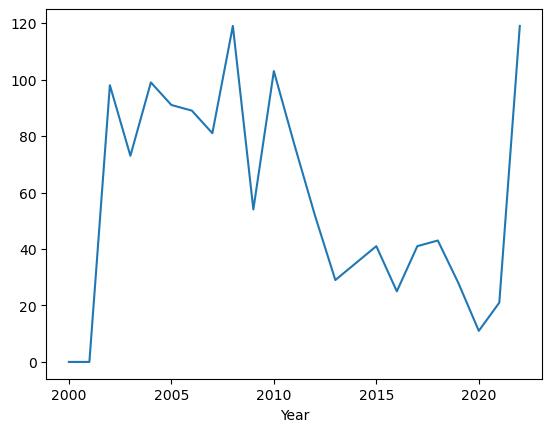

In [31]:
df.groupby(['Year']).sum()['Total number of challenged materials'].plot()

In [32]:
df.groupby(['Library']).agg({"Total number of challenged materials":"sum"})

,Total number of challenged materials
Library,
Aguilar Public Library,0.0
Akron Public Library,0.0
Alamosa Public Library,0.0
Arapahoe Library District,52.0
Aurora Public Library,7.0
...,...
West Routt Library District/Hayden,3.0
Westminster Public Library,30.0
Wetmore Community Library,0.0


<Axes: xlabel='Library'>

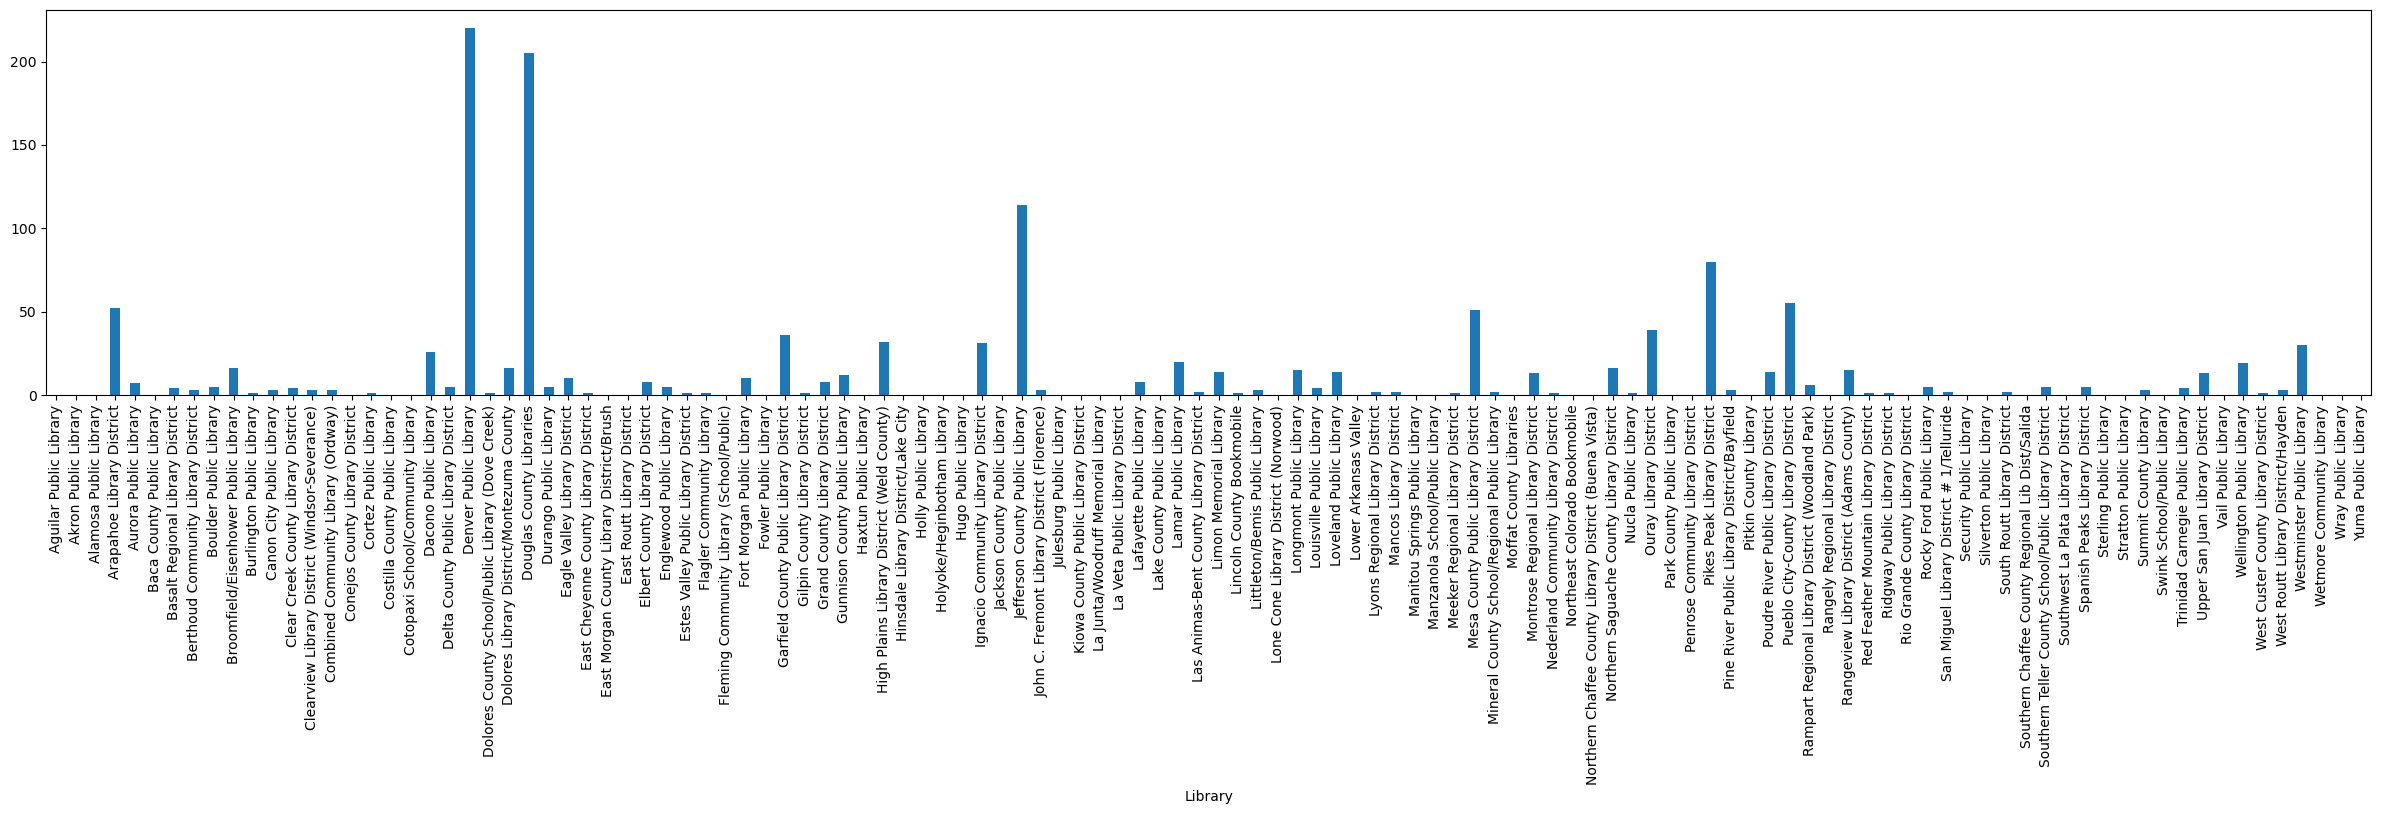

In [33]:
df.groupby(['Library']).sum()['Total number of challenged materials'].plot(kind='bar',figsize=(30,5))

In [34]:
col_challenges.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Year')

Now we have a dataframe that reports the total number of materials challenges in colorado from 2000 to 2022.

OpenFEC API:
1000 calls per hour

Documentation: https://api.open.fec.gov/developers/



In [35]:
#Load fec api key from .json in my directory
with open('openfec_api.json','r') as f:
    api_dict=json.load(f)
fec_key=api_dict['key']
#fec_key

In [36]:
page=1
trial_req=requests.get("https://api.open.fec.gov/v1/schedules/schedule_a/by_occupation/?"+
                      "page="+str(page)
                      +"&per_page="+str(50)
                      +"&occupation=Librarian"
                      +"&sort_hide_null=false&sort_null_only=false&sort_nulls_last=false"
                      +"&api_key="+fec_key 
                      )

In [48]:
trial_req_raw=trial_req.text
trial_req_json=json.loads(trial_req_raw)
trial_req_json['results']

[{'committee_id': 'C00161067',
  'count': 1,
  'cycle': 2020,
  'occupation': 'LIBRARIAN',
  'total': '10.00'},
 {'committee_id': 'C00000935',
  'count': 1,
  'cycle': 2004,
  'occupation': 'LIBRARIAN EMERITUS',
  'total': '300.00'},
 {'committee_id': 'C00000935',
  'count': 1,
  'cycle': 2004,
  'occupation': 'REFERENCE LIBRARIAN',
  'total': '250.00'},
 {'committee_id': 'C00000935',
  'count': 56,
  'cycle': 2004,
  'occupation': 'LIBRARIAN',
  'total': '4595.00'},
 {'committee_id': 'C00000935',
  'count': 1,
  'cycle': 2006,
  'occupation': 'PROFESSOR / LIBRARIAN',
  'total': '50.00'},
 {'committee_id': 'C00000935',
  'count': 2,
  'cycle': 2004,
  'occupation': 'SUBSTITUTE LIBRARIAN',
  'total': '850.00'},
 {'committee_id': 'C00000935',
  'count': 12,
  'cycle': 2006,
  'occupation': 'RETIRED LIBRARIAN',
  'total': '1100.00'},
 {'committee_id': 'C00000935',
  'count': 1,
  'cycle': 2006,
  'occupation': 'ELEMENTARY SCHOOL LIBRARIAN',
  'total': '50.00'},
 {'committee_id': 'C0000093

In [50]:
trial_req_json['pagination']['page']

1

In [51]:
trial_req_json['pagination']['pages']

228

In [49]:
trial_req_json['pagination']['page']==trial_req_json['pagination']['pages']

False

In [52]:
trial_req_json

{'api_version': '1.0',
 'pagination': {'count': 11367, 'page': 1, 'pages': 228, 'per_page': 50},
 'results': [{'committee_id': 'C00161067',
   'count': 1,
   'cycle': 2020,
   'occupation': 'LIBRARIAN',
   'total': '10.00'},
  {'committee_id': 'C00000935',
   'count': 1,
   'cycle': 2004,
   'occupation': 'LIBRARIAN EMERITUS',
   'total': '300.00'},
  {'committee_id': 'C00000935',
   'count': 1,
   'cycle': 2004,
   'occupation': 'REFERENCE LIBRARIAN',
   'total': '250.00'},
  {'committee_id': 'C00000935',
   'count': 56,
   'cycle': 2004,
   'occupation': 'LIBRARIAN',
   'total': '4595.00'},
  {'committee_id': 'C00000935',
   'count': 1,
   'cycle': 2006,
   'occupation': 'PROFESSOR / LIBRARIAN',
   'total': '50.00'},
  {'committee_id': 'C00000935',
   'count': 2,
   'cycle': 2004,
   'occupation': 'SUBSTITUTE LIBRARIAN',
   'total': '850.00'},
  {'committee_id': 'C00000935',
   'count': 12,
   'cycle': 2006,
   'occupation': 'RETIRED LIBRARIAN',
   'total': '1100.00'},
  {'committee_

In [53]:
trial_results=pd.DataFrame(trial_req_json["results"])

In [54]:
trial_results.head()

,committee_id,count,cycle,occupation,total
0,C00161067,1,2020,LIBRARIAN,10.00
1,C00000935,1,2004,LIBRARIAN EMERITUS,300.00
2,C00000935,1,2004,REFERENCE LIBRARIAN,250.00
3,C00000935,56,2004,LIBRARIAN,4595.00
4,C00000935,1,2006,PROFESSOR / LIBRARIAN,50.00


In [65]:
trial_results.shape

(50, 5)

In [55]:
trial_results.columns

Index(['committee_id', 'count', 'cycle', 'occupation', 'total'], dtype='object')

In [56]:
numCols=['cycle','total','count']
for i in numCols:
    trial_results[i]=pd.to_numeric(trial_results[i])

<Axes: xlabel='cycle'>

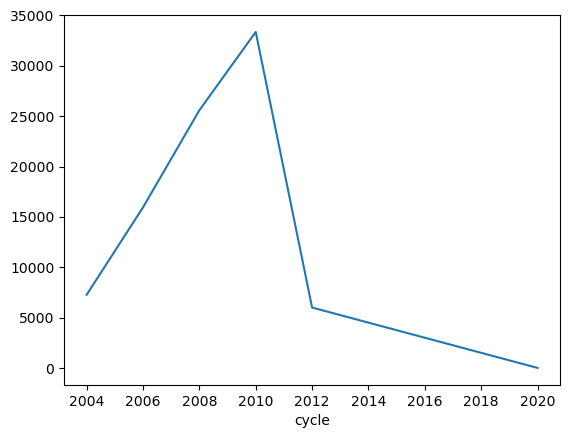

In [57]:
trial_results.groupby(['cycle']).sum()['total'].plot()

<Axes: xlabel='cycle'>

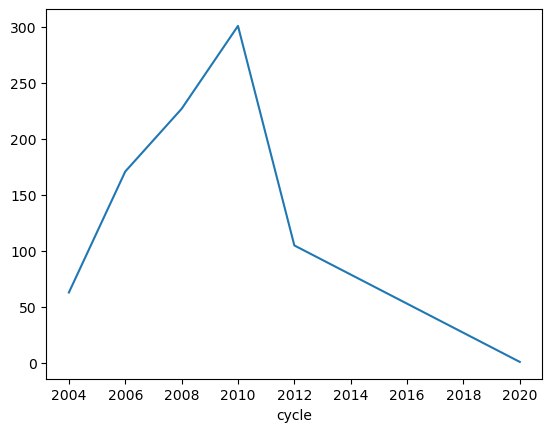

In [58]:
trial_results.groupby(['cycle']).sum()['count'].plot()

In [61]:
len(trial_results)

50

In [62]:
len(pd.concat([trial_results,trial_results]))

100

The FEC api won't give us all the data we want at once so we need to loop and request page by page until we get to the end of the data.

In [67]:
start_time = time.time()
fecDF=pd.DataFrame(columns=['committee_id', 'count', 'cycle', 'occupation', 'total'])
end=False
page=1
while(end==False):
    sleep(2)
    print("Requesting page "+str(page))
    req=requests.get("https://api.open.fec.gov/v1/schedules/schedule_a/by_occupation/?"+
                      "page="+str(page)
                      +"&per_page="+str(100)
                      +"&occupation=Librarian"
                      +"&sort_hide_null=false&sort_null_only=false&sort_nulls_last=false"
                      +"&api_key="+fec_key 
                      )
    req_json=json.loads(req.text)
    fecDF=pd.concat([fecDF,pd.DataFrame(req_json['results'])])
    print("Shape of dataframe:",fecDF.shape)
    if req_json['pagination']['page']==req_json['pagination']['pages']:
        end=True
    else:
        page+=1
print("--- %s seconds ---" % (time.time() - start_time))


Requesting page 1
Shape of dataframe: (100, 5)
Requesting page 2
Shape of dataframe: (200, 5)
Requesting page 3
Shape of dataframe: (300, 5)
Requesting page 4
Shape of dataframe: (400, 5)
Requesting page 5
Shape of dataframe: (500, 5)
Requesting page 6
Shape of dataframe: (600, 5)
Requesting page 7
Shape of dataframe: (700, 5)
Requesting page 8
Shape of dataframe: (800, 5)
Requesting page 9
Shape of dataframe: (900, 5)
Requesting page 10
Shape of dataframe: (1000, 5)
Requesting page 11
Shape of dataframe: (1100, 5)
Requesting page 12
Shape of dataframe: (1200, 5)
Requesting page 13
Shape of dataframe: (1300, 5)
Requesting page 14
Shape of dataframe: (1400, 5)
Requesting page 15
Shape of dataframe: (1500, 5)
Requesting page 16
Shape of dataframe: (1600, 5)
Requesting page 17
Shape of dataframe: (1700, 5)
Requesting page 18
Shape of dataframe: (1800, 5)
Requesting page 19
Shape of dataframe: (1900, 5)
Requesting page 20
Shape of dataframe: (2000, 5)
Requesting page 21
Shape of dataframe:

There are ~114 pages with 100 entries on them, so this cell takes a while to run, but at the end of it we have a dataframe of individual contributions by librarians with the year (cycle), total amount, total donations, and committee_id, which can be used to track the party affiliation of each donation, which can be used to determine whether librarians are generally democratic or republican leaning.

In [69]:
fecDF

,committee_id,count,cycle,occupation,total
0,C00000935,1,2004,LIBRARIAN EMERITUS,300.00
1,C00000935,1,2004,REFERENCE LIBRARIAN,250.00
2,C00000935,56,2004,LIBRARIAN,4595.00
3,C00000935,1,2008,SUBSTITUTE LIBRARIAN,75.00
4,C00161067,1,2020,LIBRARIAN,10.00
...,...,...,...,...,...
62,C00401224,2,2020,LIBRARIAN/ANALYST,27.50
63,C00401224,2,2020,LIBRARIAN (PART TIME),70.00
64,C00401224,1,2020,"RETIRED RN, NOW LIBRARIAN",50.00
65,C00401224,4,2020,SCHOOL LIBRARIAN.,20.00


In [75]:
fecDF['cycle']=pd.to_numeric(fecDF['cycle'])
fecDF['total']=pd.to_numeric(fecDF['total'])
fecDF['count']=pd.to_numeric(fecDF['count'])

<Axes: xlabel='cycle'>

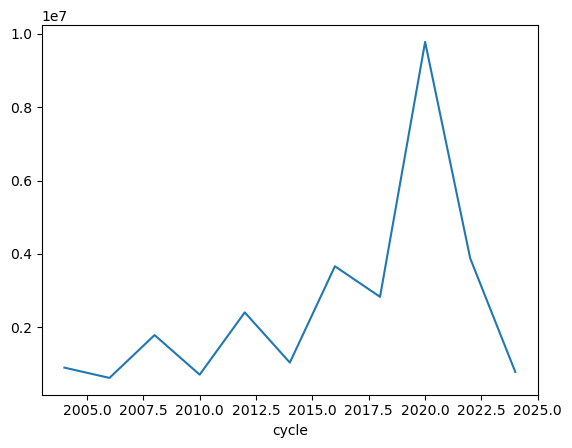

In [76]:
fecDF.groupby(['cycle']).sum()['total'].plot()

In [77]:
fecDF.to_csv("fecLibrarians")

Now we have a csv file that has the 11367 individual donations by librarians since 2004 to political committees.

BLS Public Data API:
500 queries daily


In [15]:
#Load bls api key from .json in my directory
with open('bls_api_key.json','r') as f:
    api_dict=json.load(f)
bls_key=api_dict['key']
#bls_key

In [37]:
#modeled wage estimates
#picking parameters:
prefix="WM" #modeled wage estimates
adjust="U" #unadjusted
co_code="0800000" #area code for colorado
ownership="1" #default
estimate="02" #default
industry="000000" #all industries
occupation="254022" #254022 == Librarians and Media Collections Specialists
job_char="25" # 00=all workers, 23=union, 24=nonunion, 25=fulltime
level="00" #all levels
#constructing seriesID:
WMseriesID=prefix+adjust+co_code+ownership+estimate+industry+occupation+job_char+level
WMseriesID

'WMU08000001020000002540222500'

In [38]:
starty=2011
endy=2023

trial_req=requests.get("https://api.bls.gov/publicAPI/v2/timeseries/data/"
                       +WMseriesID
                       +"?registrationkey="+bls_key
                       +"&catalog=true"
                       +"&startyear="+str(starty)
                       +"&endyear="+str(endy)
                      )
trial_req

<Response [200]>

In [39]:
trial_req_raw=trial_req.text
trial_req_json=json.loads(trial_req_raw)
trial_req_json

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 245,
 'message': ['No Data Available for Series WMU08000001020000002540222500 Year: 2011',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2012',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2013',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2014',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2015',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2016',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2017',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2018',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2019',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2020',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2021',
  'No Data Available for Series WMU08000001020000002540222500 Year: 2023'],
 'Results': {'series': [{'seriesID

In [40]:
trial_req_json["Results"]

{'series': [{'seriesID': 'WMU08000001020000002540222500',
   'catalog': {'series_title': 'Average hourly wage for full-time librarians and media collections specialists in Colorado',
    'series_id': 'WMU08000001020000002540222500',
    'seasonality': 'Not Seasonally Adjusted',
    'survey_name': 'Modeled Wage Estimates',
    'survey_abbreviation': 'WM',
    'measure_data_type': 'Average Hourly Wage',
    'commerce_industry': 'All industries',
    'occupation': 'Librarians and Media Collections Specialists',
    'occupation_work_class': 'Civilian workers',
    'area': 'Colorado'},
   'data': [{'year': '2022',
     'period': 'A01',
     'periodName': 'Annual',
     'latest': 'true',
     'value': '31.47',
     'footnotes': [{}]}]}]}

It appears that the only wage data for librarians was collected in 2022, which means that we can't track the changes in librarians wages over the same time period that we are collecting data from the other two apis, though this information is still useful to contextualize the other data.

MIT License:
Copyright (c) 2023 R. Avery Harrell

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.